## Importing Libaries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
data=pd.read_csv('./data/processed/combined.csv')
data.shape

(591, 14)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.000000,0,2,185.0,0,0.0,0,0,0,0
1,29,1,2,120.0,243.000000,0,0,160.0,0,0.0,0,0,0,0
2,29,1,2,140.0,249.019366,0,0,170.0,0,0.0,0,0,0,0
3,30,0,1,170.0,237.000000,0,1,170.0,0,0.0,0,0,6,0
4,31,0,2,100.0,219.000000,0,1,150.0,0,0.0,0,0,0,0


## Description of Dataset
- age (#)
- sex : 1 = Male, 0 = Female (Binary)
- (cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
- (trestbps) resting blood pressure (#)
- (chol) serum cholestoral in mg/dl (#)
- (fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]
- (restecg) resting electrocardiographic results [values 0,1,2]
- (thalach) maximum heart rate achieved (#)
- (exang) exercise induced angina (Binary) [1 = yes; 0 = no]
- (oldpeak) = ST depression induced by exercise relative to rest (#)
- (slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping)
- (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy
- (thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]

## EDA

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Missing Value Detection

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values but you can see that there is a ? in col column which indicates that null values are representated using a question mark.Hence, they will be handled later in the code.

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.00000,591.000000,591.000000,591.000000
mean,51.201354,0.700508,2.568528,132.135593,249.019366,0.106599,0.609137,144.400000,0.314721,0.821997,0.63621,0.340102,0.686971,0.411168
std,9.093212,0.458424,1.048788,17.670868,58.772569,0.308864,0.868186,23.808829,0.464798,1.071190,0.78846,0.746335,1.402836,0.492462
min,28.000000,0.000000,0.000000,92.000000,85.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,128.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,52.000000,1.000000,3.000000,130.000000,245.000000,0.000000,0.000000,146.000000,0.000000,0.200000,0.00000,0.000000,0.000000,0.000000
75%,58.000000,1.000000,3.000000,140.000000,277.000000,0.000000,2.000000,162.000000,1.000000,1.500000,1.00000,0.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.00000,3.000000,7.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       591 non-null    int64  
 1   sex       591 non-null    int64  
 2   cp        591 non-null    int64  
 3   trestbps  591 non-null    float64
 4   chol      591 non-null    float64
 5   fbs       591 non-null    int64  
 6   restecg   591 non-null    int64  
 7   thalach   591 non-null    float64
 8   exang     591 non-null    int64  
 9   oldpeak   591 non-null    float64
 10  slope     591 non-null    int64  
 11  ca        591 non-null    int64  
 12  thal      591 non-null    int64  
 13  target    591 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 64.8 KB


### Plotting Correlation Matrix

In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.060729,-0.037438,0.240659,0.119939,0.184251,0.263109,-0.302501,0.159024,0.252514,0.157276,0.395228,0.091713,0.219174
sex,-0.060729,1.000000,0.136179,0.010015,-0.073521,0.034332,-0.030589,-0.095286,0.148795,0.096966,0.054438,0.035658,0.128073,0.268601
cp,-0.037438,0.136179,1.000000,0.031683,0.108720,-0.067064,-0.146439,-0.404845,0.390299,0.152691,0.289480,-0.041735,0.081997,0.376886
trestbps,0.240659,0.010015,0.031683,1.000000,0.103279,0.140197,0.078365,-0.119870,0.138009,0.185825,0.153054,0.050731,0.025431,0.143359
chol,0.119939,-0.073521,0.108720,0.103279,1.000000,0.051241,0.085304,-0.072068,0.113697,0.062355,0.103067,0.051782,0.023604,0.142031
fbs,0.184251,0.034332,-0.067064,0.140197,0.051241,1.000000,0.111399,-0.005347,0.049263,0.054375,0.055114,0.165977,0.041937,0.079077
restecg,0.263109,-0.030589,-0.146439,0.078365,0.085304,0.111399,1.000000,0.060136,0.070146,0.179300,0.046957,0.297057,0.039927,0.134704
thalach,-0.302501,-0.095286,-0.404845,-0.119870,-0.072068,-0.005347,0.060136,1.000000,-0.377754,-0.260009,-0.360701,-0.063755,-0.077104,-0.344362
exang,0.159024,0.148795,0.390299,0.138009,0.113697,0.049263,0.070146,-0.377754,1.000000,0.426237,0.511816,0.106226,0.161745,0.499990
oldpeak,0.252514,0.096966,0.152691,0.185825,0.062355,0.054375,0.179300,-0.260009,0.426237,1.000000,0.653269,0.301851,0.150316,0.481802


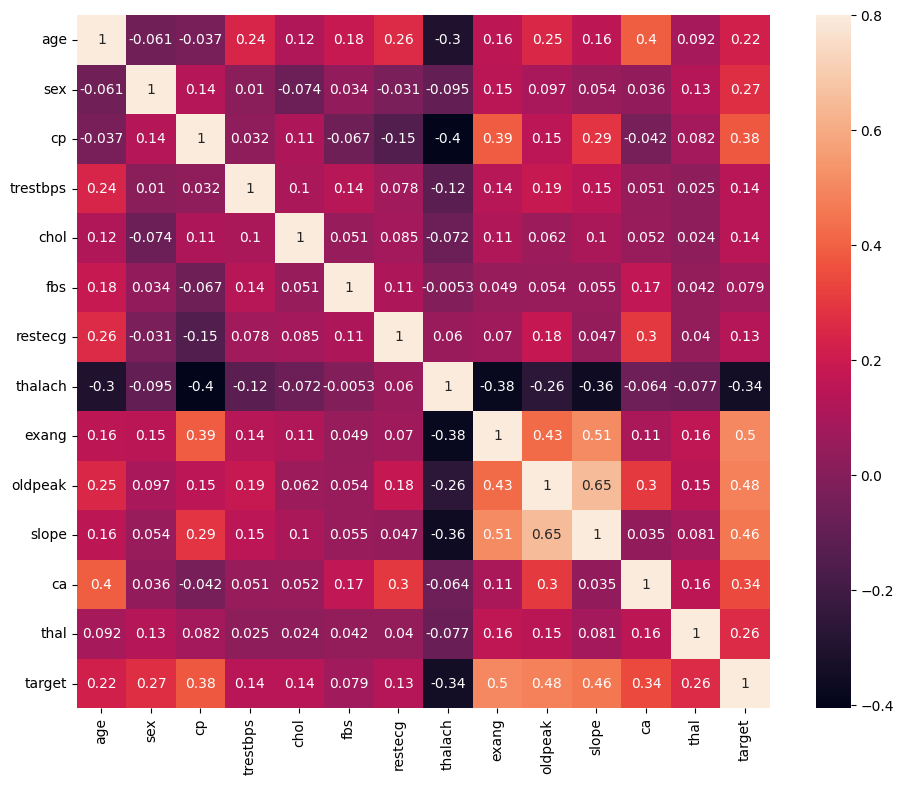

In [10]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

You can see that  cp, oldspeak are the two variables that are higly positively correlated. While others are weakly positively correlated, there is no negative correlation.

### Pair Plot
It can be used to study the distribution and relationship between variables

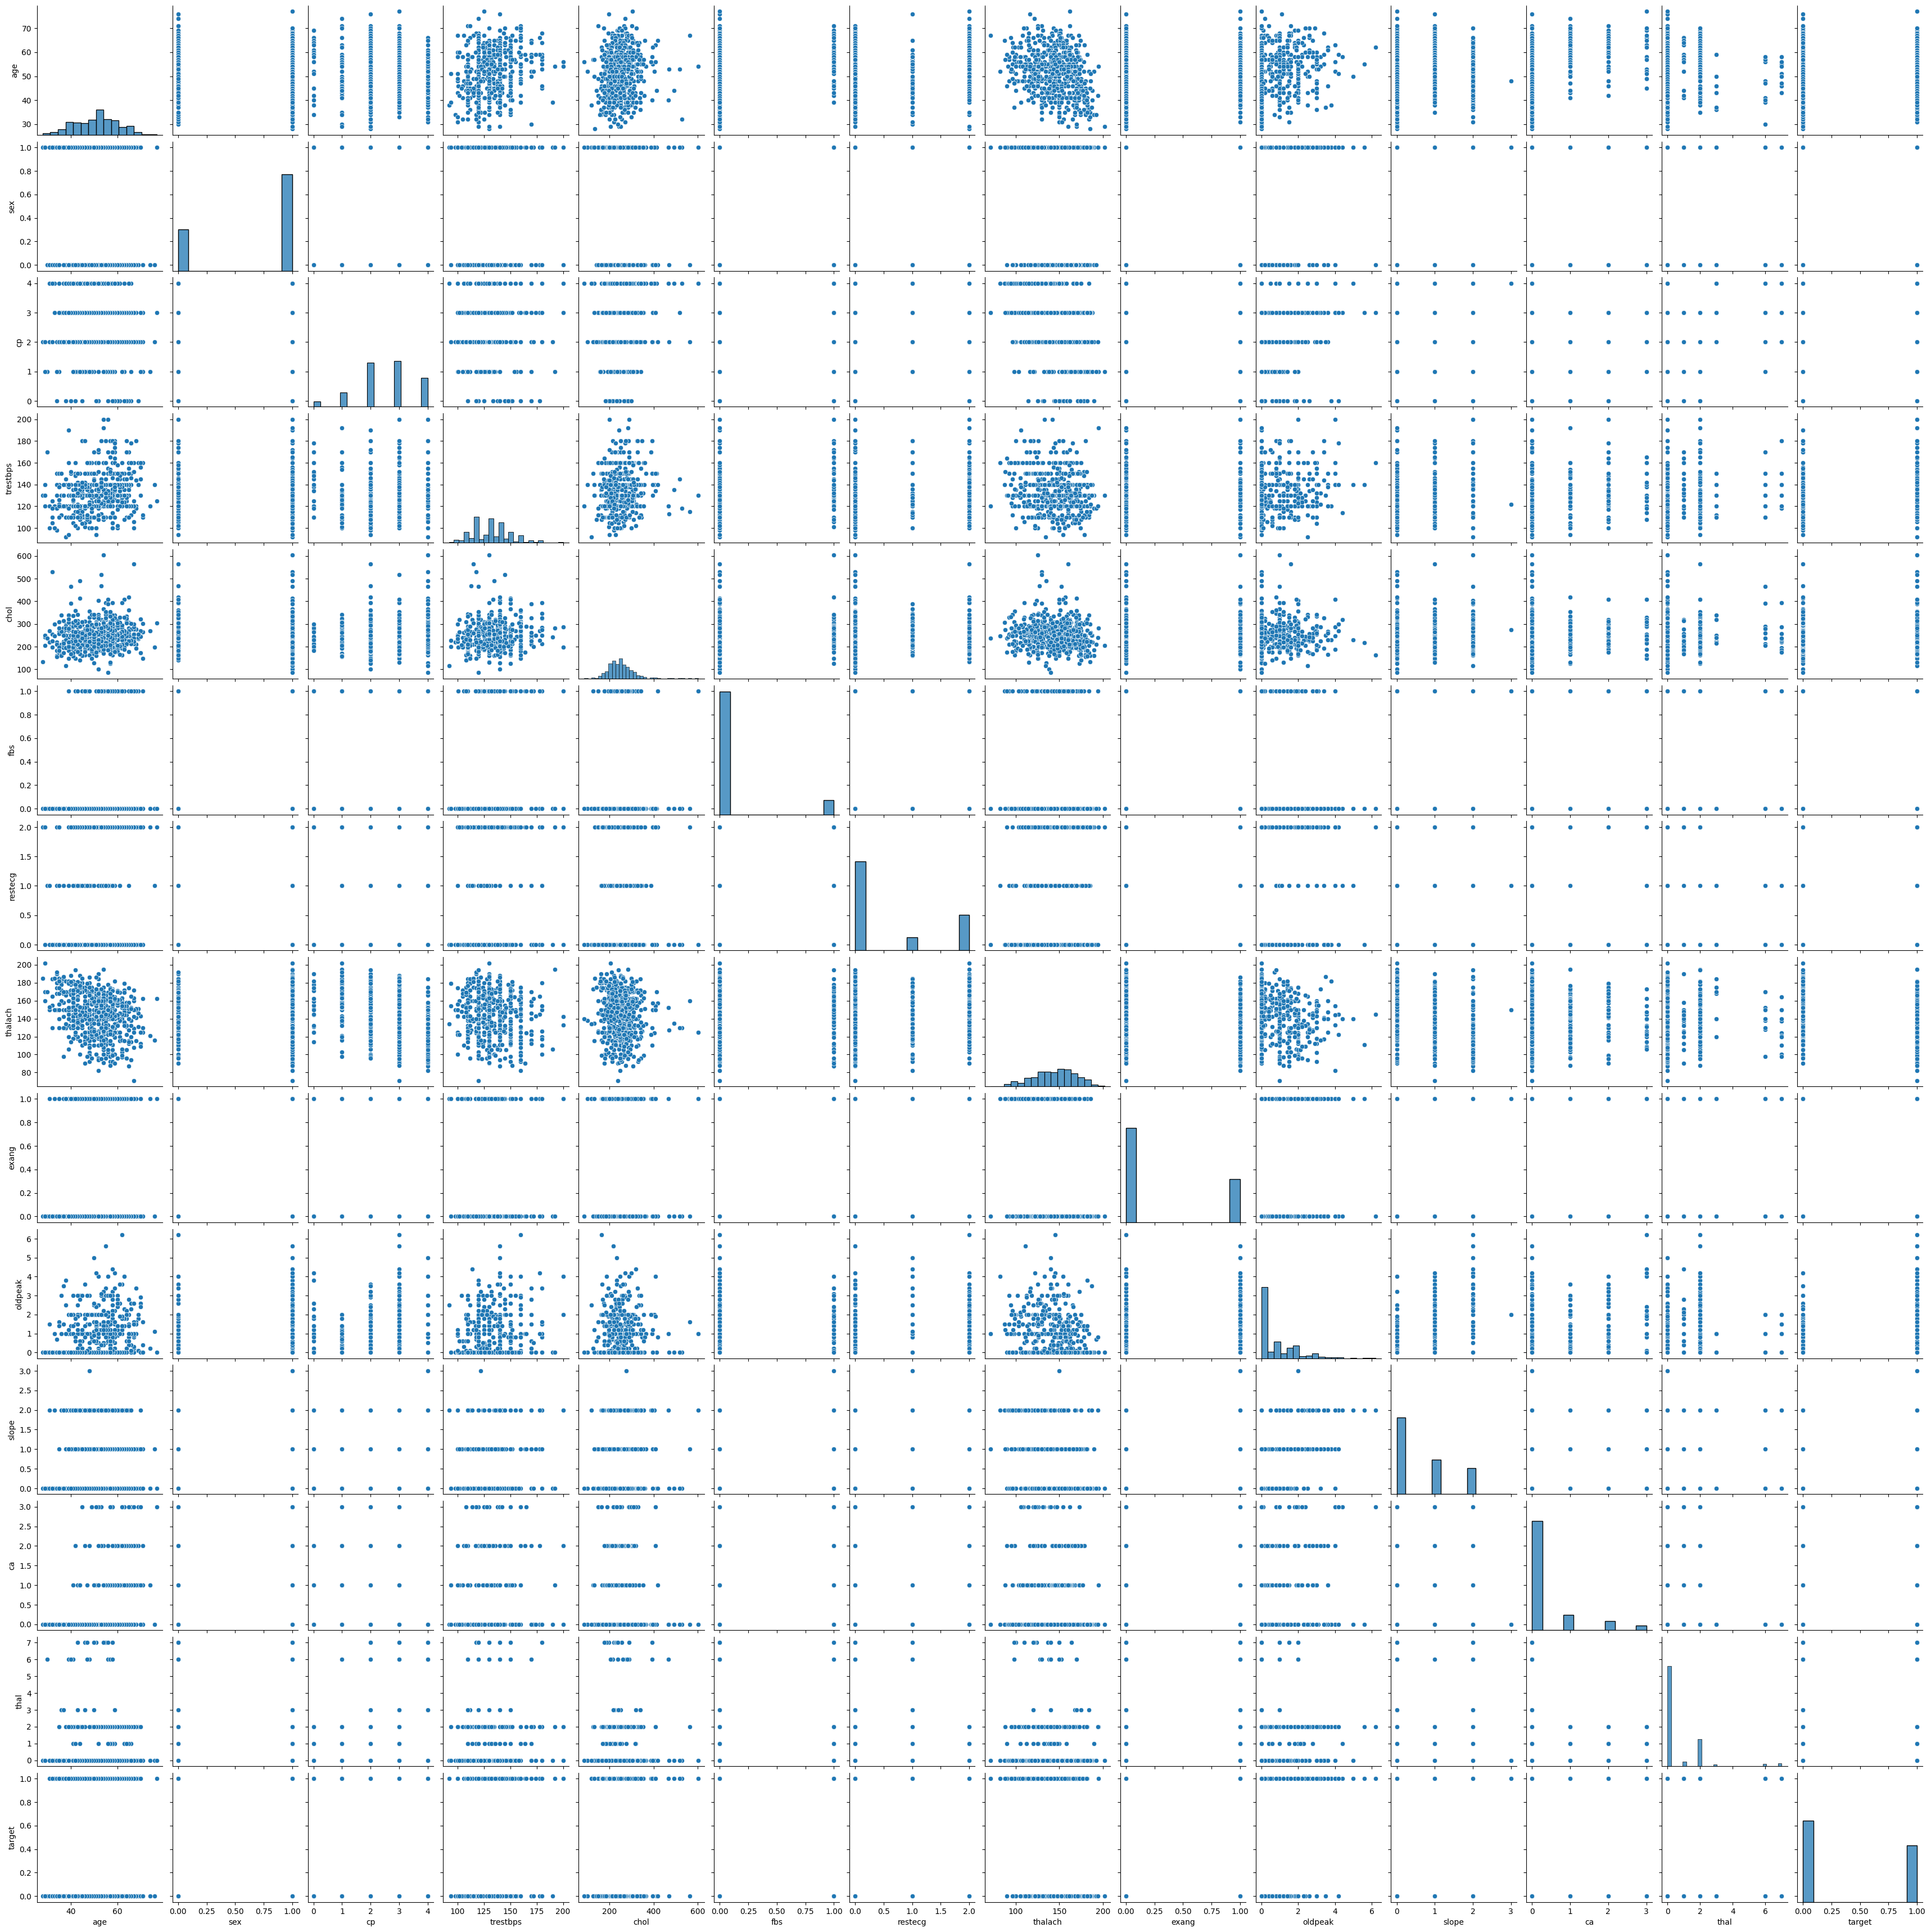

In [11]:
sns.pairplot(data)
plt.show()

### Outlier Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

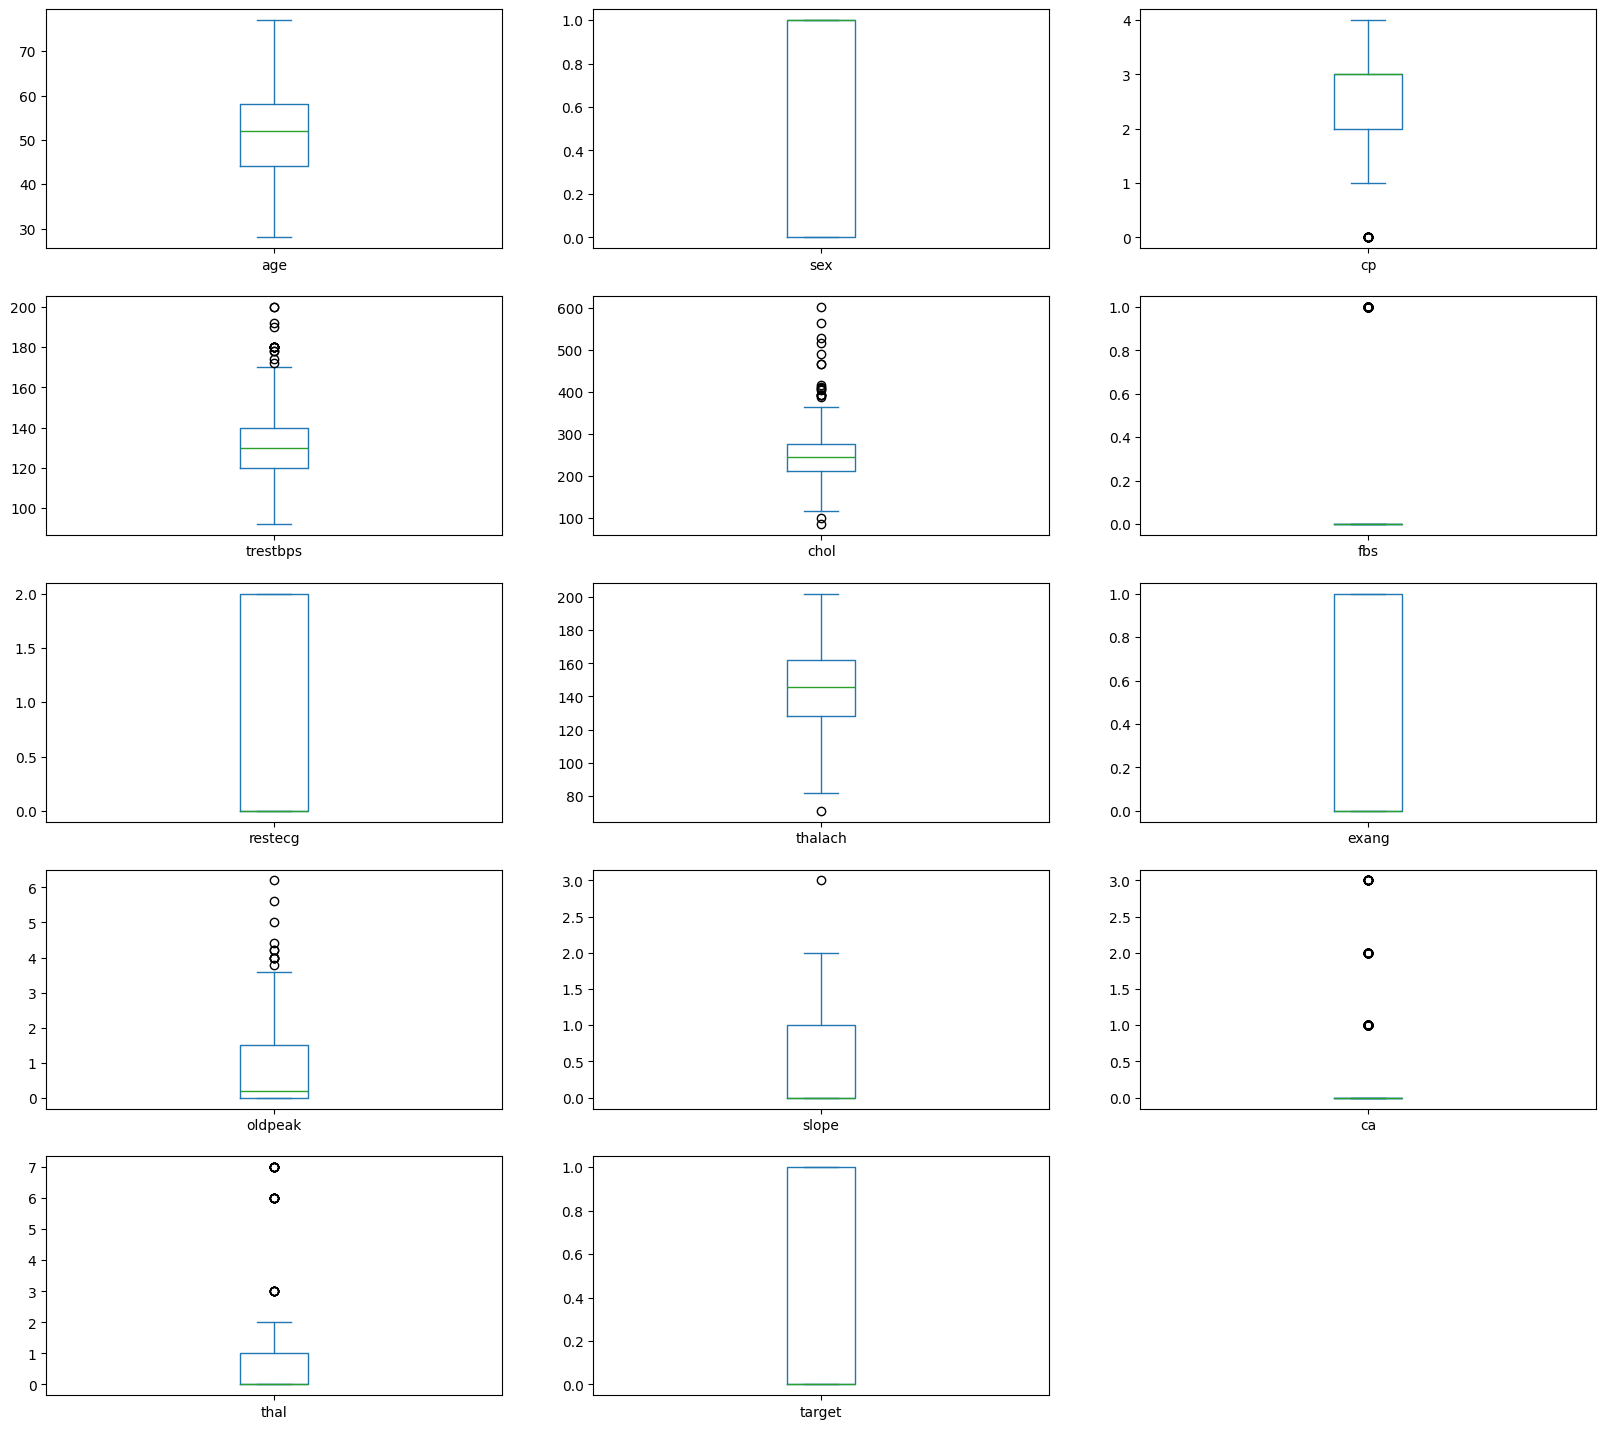

In [12]:
data.plot(kind='box',subplots=True,layout=(5,3),sharex=False,figsize=(20,18))
plt.show

### Bar Charts for Categorical Columns
trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang 

<Axes: xlabel='slope'>

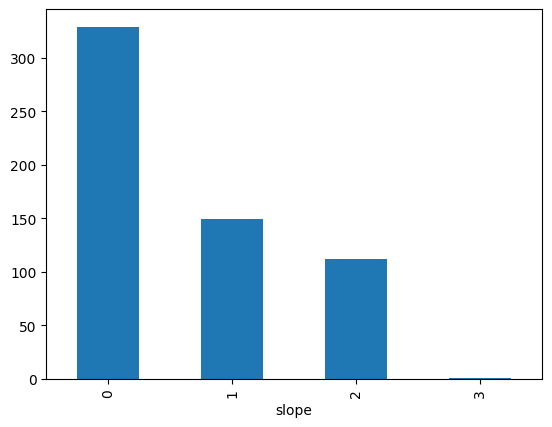

In [13]:
data['slope'].value_counts().plot(kind='bar')

<Axes: xlabel='restecg'>

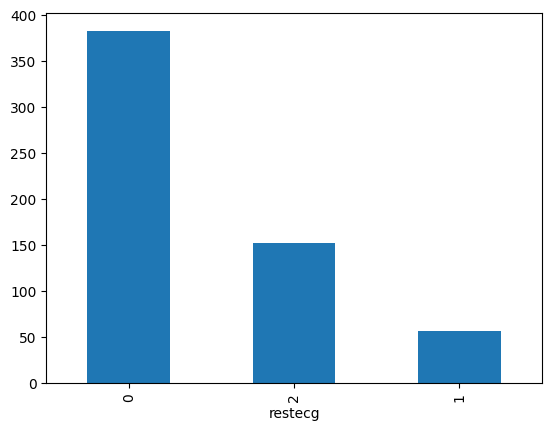

In [14]:
data['restecg'].value_counts().plot(kind='bar')

<Axes: xlabel='ca'>

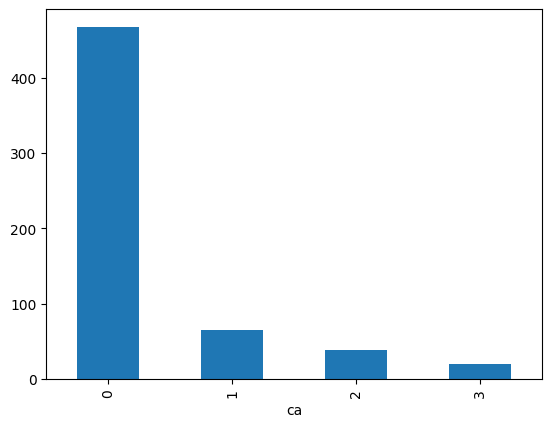

In [15]:
data['ca'].value_counts().plot(kind='bar')

<Axes: xlabel='exang'>

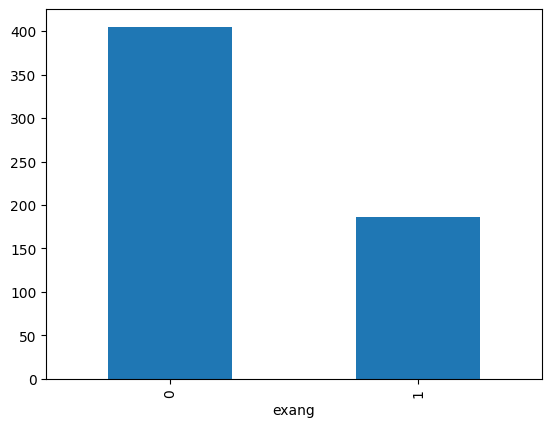

In [16]:
data['exang'].value_counts().plot(kind='bar')

<Axes: xlabel='thal'>

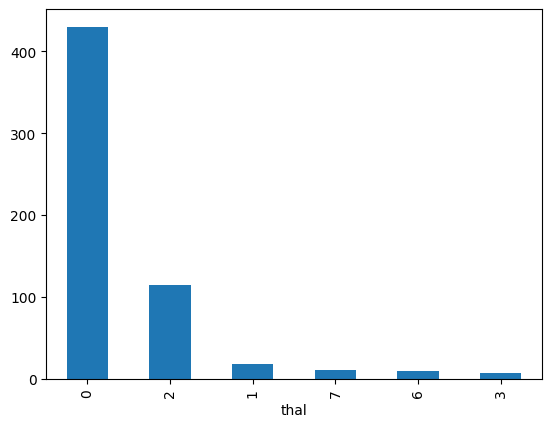

In [17]:
data['thal'].value_counts().plot(kind='bar')

<Axes: xlabel='fbs'>

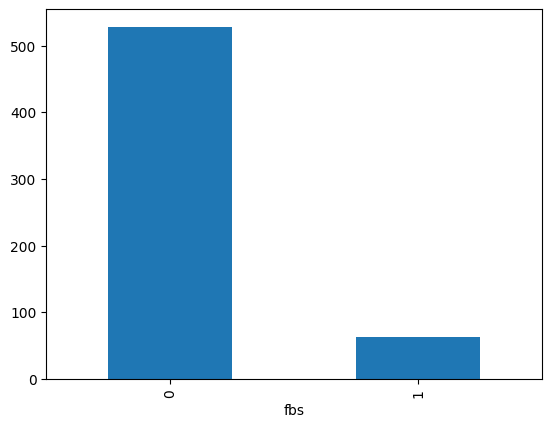

In [18]:
data['fbs'].value_counts().plot(kind='bar')

### Exploring Age and Sex Column

In [19]:
men = data['sex'].sum() # '1' indicates male and '0' indicates female
print('There are '+ str(men) + ' males and '+ str(data.shape[0] - men) + ' females in the dataset')

There are 414 males and 177 females in the dataset


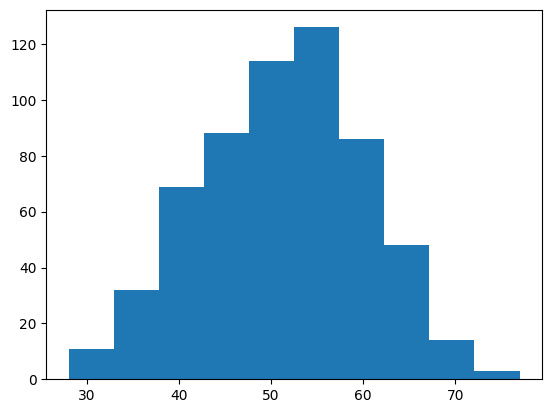

In [20]:
plt.hist(data['age'])
plt.show()

In [21]:
data.groupby('age').sum()['target']

age
28     0
29     0
30     0
31     1
32     1
33     1
34     1
35     3
36     1
37     1
38     5
39     2
40     4
41     5
42     1
43     6
44     6
45     3
46     9
47     7
48    11
49     9
50     8
51     5
52    12
53     5
54    15
55    10
56    11
57    12
58    17
59    12
60    10
61     7
62     7
63     7
64     4
65     7
66     4
67     6
68     2
69     1
70     3
71     0
74     0
76     0
77     1
Name: target, dtype: int64

You can see that most people from age 46-50 have heart diseases

In [22]:
data.groupby('sex').sum()['target']

sex
0     37
1    206
Name: target, dtype: int64

This dataset has majority of male specimen

### Heart Disease Frequency Per Chest Pain Type

In [23]:
pd.crosstab(data.cp, data['target'])

target,0,1
cp,,
0,16,7
1,47,13
2,163,26
3,82,114
4,40,83


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

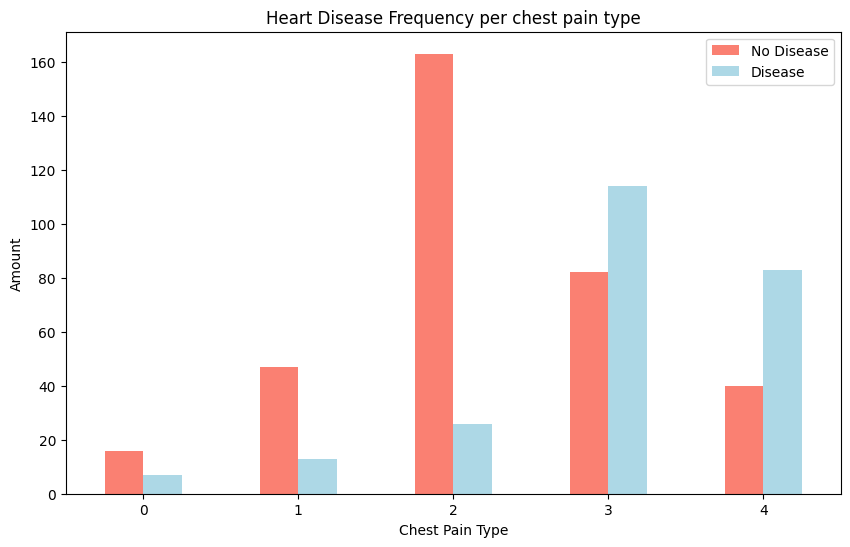

In [24]:
pd.crosstab(data.cp, data['target']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

### Heart Disease Distribution According to Sex

In [25]:
pd.crosstab(data.sex,data['target'])

target,0,1
sex,,
0,140,37
1,208,206


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

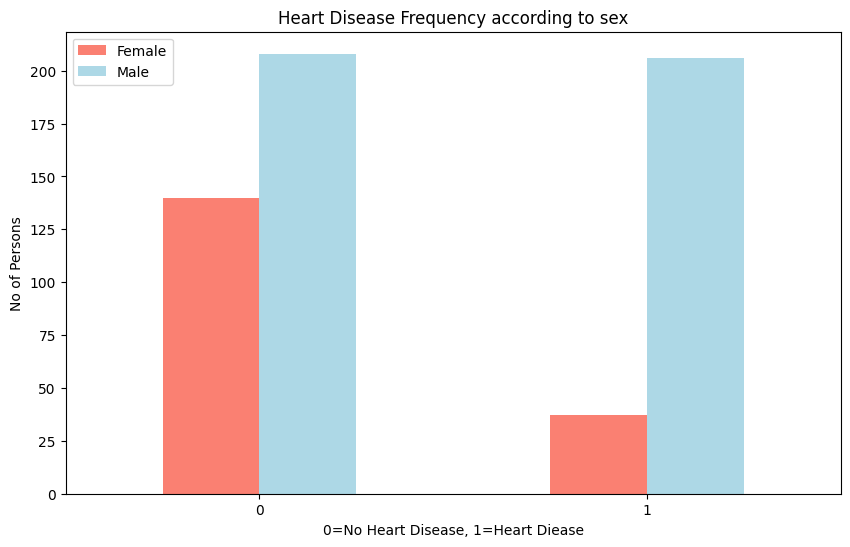

In [26]:
pd.crosstab(data['target'],data.sex).plot(kind="bar", figsize=(10,6) , color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency according to sex")
plt.xlabel("0=No Heart Disease, 1=Heart Diease")
plt.ylabel("No of Persons")
plt.legend([ "Female","Male"])
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

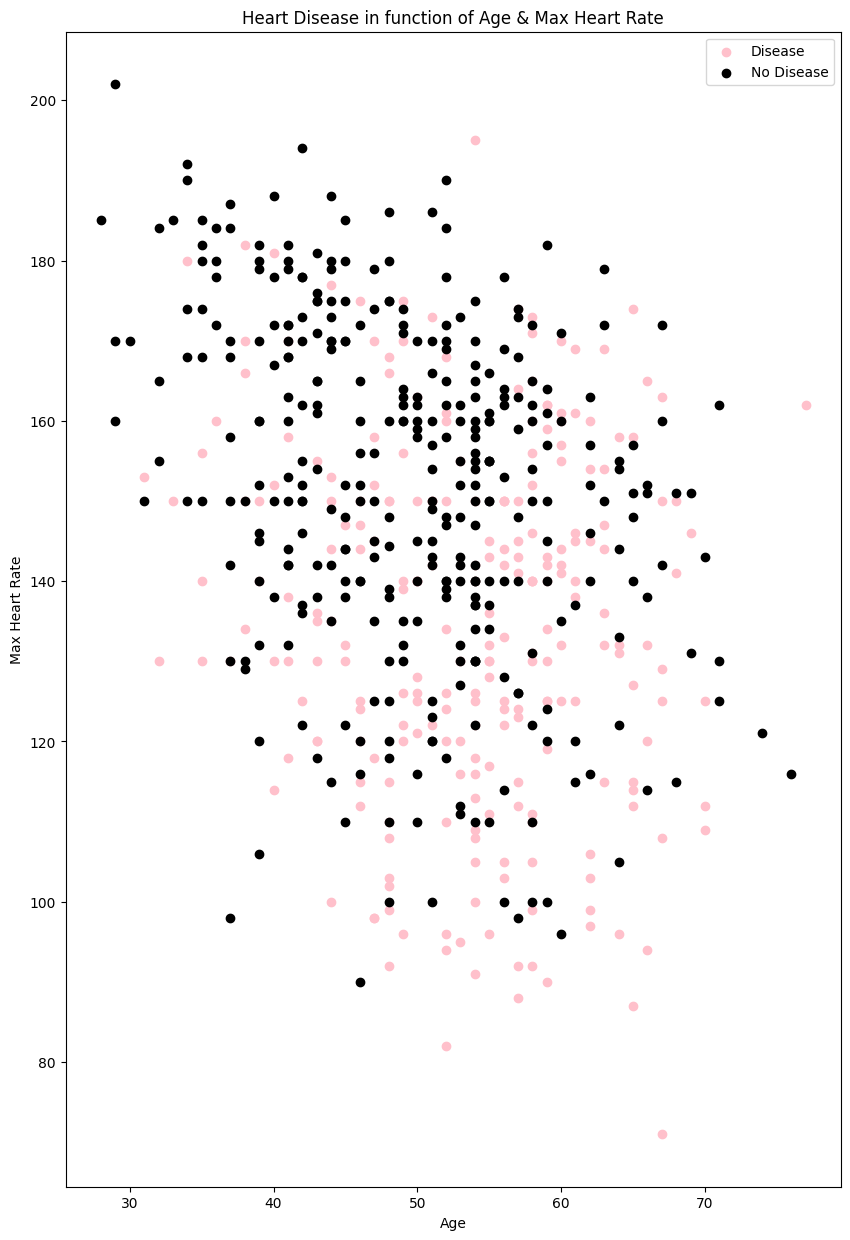

In [27]:
# Create another figure
plt.figure(figsize=(10,15))

# Scatter with positive examples
plt.scatter(data.age[data['target']==1],
           data.thalach[data['target']==1],
           c="pink");

# Scatter with negative examples
plt.scatter(data.age[data['target']==0],
           data.thalach[data['target']==0],
           c="black");

# add some helpful title
plt.title("Heart Disease in function of Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Preprocessing

### Renaming num to target as column

### Cleaning ? values

### Scaling Columns

In [28]:
#Getting Pandas Dummies for ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','thal','ca'])

In [29]:
#Scaling the other attributes using normal scaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [30]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,thal_0,thal_1,thal_2,thal_3,thal_6,thal_7,ca_0,ca_1,ca_2,ca_3
0,-2.553664,-0.120956,-1.992741,1.706694,-0.768018,0,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1,-2.443599,-0.687339,-0.102505,0.655774,-0.768018,0,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
2,-2.443599,0.445426,0.000000,1.076142,-0.768018,0,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,-2.333533,2.144574,-0.204680,1.076142,-0.768018,0,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False
4,-2.223468,-1.820104,-0.511204,0.235406,-0.768018,0,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


### Splitting Dataset

In [31]:
#80% Train and 20% Test Data
y = data['target']
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [32]:
#Analysing the shape of X_train and X_test Data
print(X_train.shape)
print(X_test.shape)

(472, 33)
(119, 33)


### Plotting Target Variable

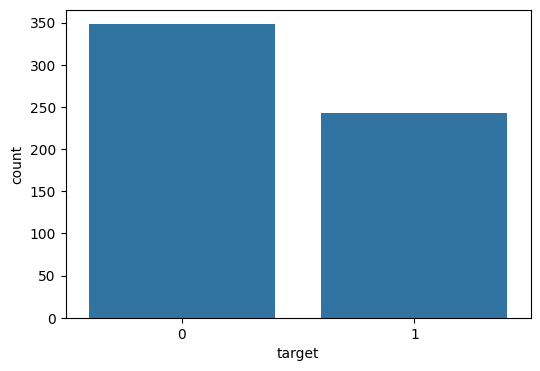

In [33]:
#Plotting the Target (Heart Disease)
plt.figure(figsize=(6,4))
sns.countplot(data,x="target")
plt.show()

## Models
The following models will predict if the person has a heart disease or not.
### Random Forest

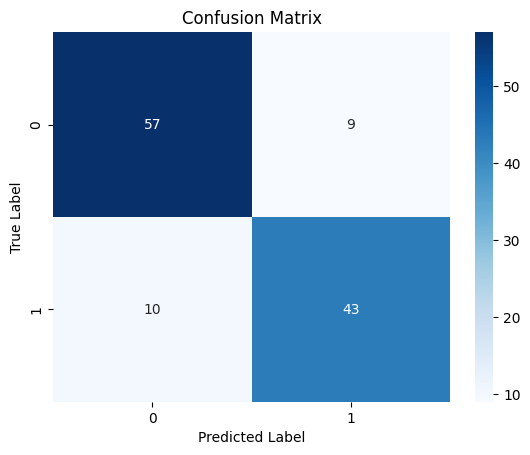

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        66
           1       0.83      0.81      0.82        53

    accuracy                           0.84       119
   macro avg       0.84      0.84      0.84       119
weighted avg       0.84      0.84      0.84       119



Accuracy of Random Forest Classifier: 84.034 %



In [34]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=500,random_state=1)
model.fit(X_train,y_train)
rfpred=model.predict(X_test)
RF_conf_matrix = confusion_matrix(y_test, rfpred)
rf_acc_score = accuracy_score(y_test, rfpred)

#Printing the confussion matrix and accuracy scores
sns.heatmap(RF_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, rfpred))
print("\n")
print("Accuracy of Random Forest Classifier: {:.3f}".format(rf_acc_score*100),'%\n')

In [35]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y,cv=10,scoring='r2')

print(f"Cross Validation R2 Scores: {cv_scores}" )
print(f"Mean R2 value: {cv_scores.mean()}" )

Cross Validation R2 Scores: [ 0.10857143  0.22738095  0.43809524 -0.05357143 -0.26428571 -1.45833333
  0.29761905  0.29761905  0.86117647 -0.45764706]
Mean R2 value: -0.0003375350140055189


### Logistic Regression

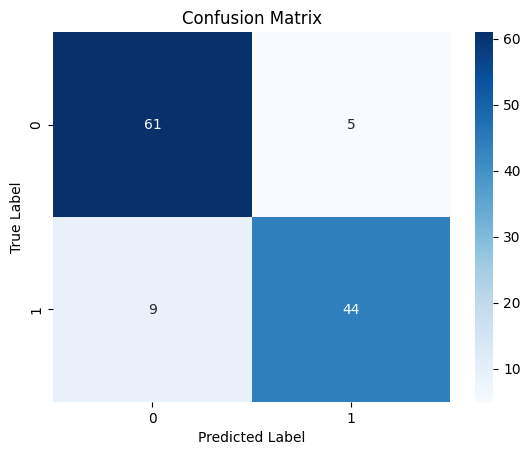

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        66
           1       0.90      0.83      0.86        53

    accuracy                           0.88       119
   macro avg       0.88      0.88      0.88       119
weighted avg       0.88      0.88      0.88       119

Accuracy of Logistic Regression: 88.235 %



In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

#Printing the confussion matrix and accuracy scores
# Create a heatmap using seaborn
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test,lr_predict))
print("Accuracy of Logistic Regression: {:.3f}".format(lr_acc_score*100),'%\n')

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr,X,y,cv=10,scoring='r2')

print(f"Cross Validation R2 Scores: {cv_scores}" )
print(f"Mean R2 value: {cv_scores.mean()}" )

Cross Validation R2 Scores: [ 0.04        0.36785714  0.29761905  0.22738095 -0.19404762 -0.96666667
  0.36785714  0.36785714  0.72235294  0.09764706]
Mean R2 value: 0.13278571428571434


### Decision Tree Classifier

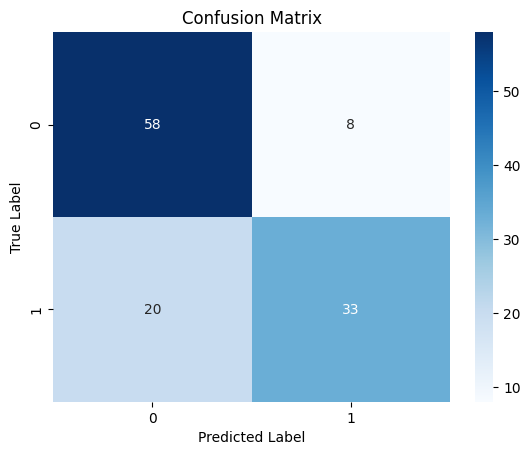

              precision    recall  f1-score   support

           0       0.74      0.88      0.81        66
           1       0.80      0.62      0.70        53

    accuracy                           0.76       119
   macro avg       0.77      0.75      0.75       119
weighted avg       0.77      0.76      0.76       119

Accuracy of DecisionTreeClassifier: 76.471 %



In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4)
model = dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)


dt_acc_score = accuracy_score(y_test, dt_predict)

# Generate the confusion matrix
dt_cm = confusion_matrix(y_test, dt_predict)

# Create a heatmap using seaborn
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test,dt_predict))
print("Accuracy of DecisionTreeClassifier: {:.3f}".format(dt_acc_score*100),'%\n')

In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt,X,y,cv=10,scoring='r2')

print(f"Cross Validation R2 Scores: {cv_scores}" )
print(f"Mean R2 value: {cv_scores.mean()}" )

Cross Validation R2 Scores: [ 0.17714286  0.08690476 -0.19404762  0.08690476 -0.19404762 -0.96666667
  0.29761905 -0.19404762  0.44470588 -0.31882353]
Mean R2 value: -0.07743557422969184


### Model Comparison

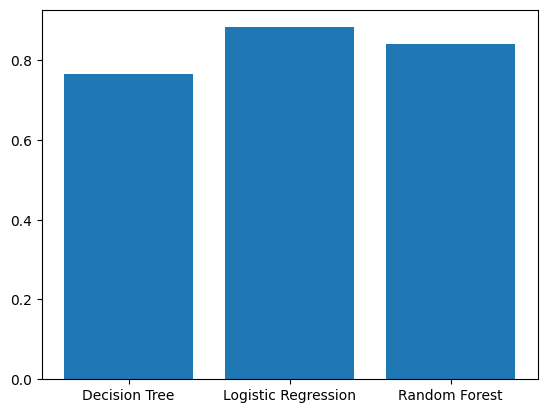

In [40]:
accuracies = [dt_acc_score,lr_acc_score,rf_acc_score]
models = ["Decision Tree","Logistic Regression","Random Forest"]
model_comparison = pd.DataFrame({
    "Accuracy":accuracies,
    "Model": models
})
plt.bar(models,accuracies)
plt.show()

In [ ]:
# We can see that Logistic Regression has the highest accuracy score, we will save the model_checkpoints for use in the web app
import pickle
pickle.dump(lr,open('./model_checkpoints/heart_attack_lr.pkl','wb'))